In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("dataset.csv")

# Data Understanding

In [4]:
df.head()

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,9/26/2016 3:26
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,9/26/2016 3:24
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,9/26/2016 3:19
3,12578989,algorithmic music,http://cacm.acm.org/magazines/2011/7/109891-al...,1,0,poindontcare,9/26/2016 3:16
4,12578979,How the Data Vault Enables the Next-Gen Data W...,https://www.talend.com/blog/2016/05/12/talend-...,1,0,markgainor1,9/26/2016 3:14


In [5]:
df.shape

(293119, 7)

In [6]:
df.describe()

,id,num_points,num_comments
count,2.931190e+05,293119.000000,293119.000000
mean,1.133046e+07,15.025324,6.525544
std,6.961055e+05,58.504103,30.376319
min,1.017690e+07,1.000000,0.000000
25%,1.071636e+07,1.000000,0.000000
50%,1.130303e+07,2.000000,0.000000
75%,1.193152e+07,4.000000,1.000000
max,1.257901e+07,5771.000000,2531.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293119 entries, 0 to 293118
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            293119 non-null  int64 
 1   title         293119 non-null  object
 2   url           279256 non-null  object
 3   num_points    293119 non-null  int64 
 4   num_comments  293119 non-null  int64 
 5   author        293119 non-null  object
 6   created_at    293119 non-null  object
dtypes: int64(3), object(4)
memory usage: 15.7+ MB


# Data Cleaning

Cleck for Null values

In [8]:
df.isnull().sum()

id                  0
title               0
url             13863
num_points          0
num_comments        0
author              0
created_at          0
dtype: int64

Check for duplicates

In [9]:
duplicate_rows = df[df.duplicated()].count()
duplicate_rows

id              0
title           0
url             0
num_points      0
num_comments    0
author          0
created_at      0
dtype: int64

Check for unique values

In [10]:
df.author.unique()

array(['altstar', 'blacksqr', 'pavel_lishin', ..., 'tiwarijatin',
       'britman', 'ggillas'], dtype=object)

In [11]:
df.created_at.dtype

dtype('O')

Converting date time string to date time format

In [12]:
df.created_at = pd.to_datetime(df.created_at)

# Data Analysis

Finding which Author has written max news.

In [13]:
df.head(3)

,id,title,url,num_points,num_comments,author,created_at
0,12579008,You have two days to comment if you want stem ...,http://www.regulations.gov/document?D=FDA-2015...,1,0,altstar,2016-09-26 03:26:00
1,12579005,SQLAR the SQLite Archiver,https://www.sqlite.org/sqlar/doc/trunk/README.md,1,0,blacksqr,2016-09-26 03:24:00
2,12578997,What if we just printed a flatscreen televisio...,https://medium.com/vanmoof/our-secrets-out-f21...,1,0,pavel_lishin,2016-09-26 03:19:00


In [14]:
num_of_news_by_author = df.groupby('author').id.count()

In [15]:
max_news = num_of_news_by_author.max()
max_news_author = num_of_news_by_author.idxmax()

print(f"Author: {max_news_author} has written the maximum number of news articles: {max_news}")

Author: jonbaer has written the maximum number of news articles: 2731


Top 10 authors with max number of News posts

In [16]:
top_authors = num_of_news_by_author.sort_values(ascending=False).head(10)
top_authors

author
jonbaer       2731
ingve         2487
prostoalex    1656
dnetesn       1517
jseliger      1382
bootload       990
walterbell     931
williswee      831
doener         816
DiabloD3       809
Name: id, dtype: int64

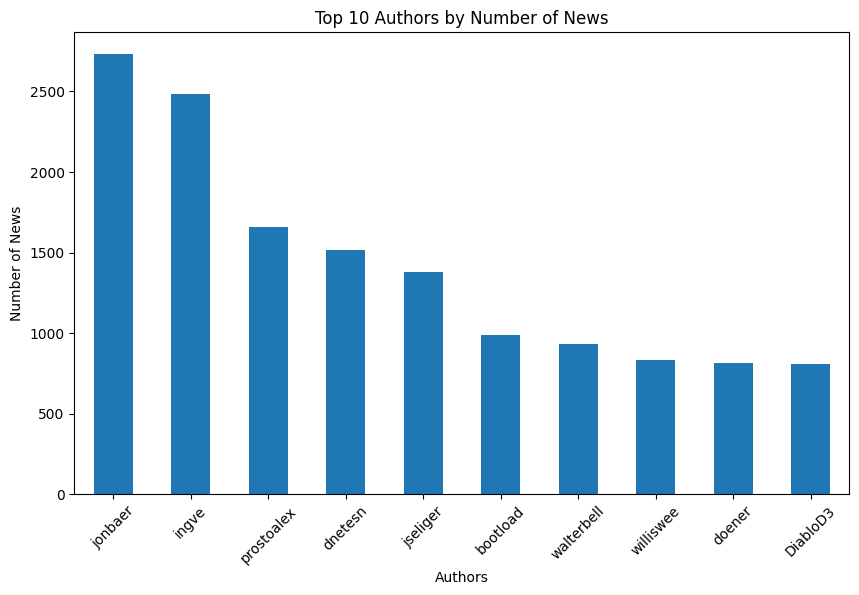

In [17]:
top_authors.plot(kind="bar", figsize=(10, 6))
plt.xlabel('Authors')
plt.ylabel('Number of News')
plt.title('Top 10 Authors by Number of News')
plt.xticks(rotation=45)  
plt.show()

Top 10 popular News by up votes

In [18]:
popular_news_by_upvote = df.sort_values(by='num_points', ascending=False)
popular_news_by_upvote = popular_news_by_upvote[['title', 'author', 'num_points']]
popular_news_by_upvote.head(10)

,title,author,num_points
170017,A Message to Our Customers,epaga,5771
69169,UK votes to leave EU,dmmalam,3125
9263,Pardon Snowden,erlend_sh,2553
57128,Tell HN: New features and a moderator,dang,2381
136284,Ubuntu on Windows,bpierre,2049
77812,Microsoft to acquire LinkedIn for $26B,whatok,2049
174476,"Physicists Detect Gravitational Waves, Proving...",intull,2011
285866,14-Year-Old Boy Arrested for Bringing Homemade...,ahmad19526,1952
186965,Request For Research: Basic Income,mattkrisiloff,1876
49668,Why Im Suing the US Government,ivank,1855


Top 10 popular News by up comments


In [19]:
popular_news_by_comments = df.sort_values(by='num_comments', ascending=False)
popular_news_by_comments = popular_news_by_comments[['title', 'author', 'num_comments']]
popular_news_by_comments.head(10)

,title,author,num_comments
69169,UK votes to leave EU,dmmalam,2531
14083,iPhone 7,benigeri,1733
87442,Moving Forward on Basic Income,dwaxe,1448
186965,Request For Research: Basic Income,mattkrisiloff,1120
86558,Ask HN: Who is hiring? (June 2016),whoishiring,1007
178526,GitHub is undergoing a full-blown overhaul as ...,easyd,973
170017,A Message to Our Customers,epaga,967
42275,Ask HN: Who is hiring? (August 2016),whoishiring,947
109928,Ask HN: Who is hiring? (May 2016),whoishiring,937
18411,Ask HN: Who is hiring? (September 2016),whoishiring,910


In [38]:
top_news = pd.merge(popular_news_by_upvote, popular_news_by_comments, on="title")[['title', 'author_x', 'num_points', 'num_comments']]
top_news = top_news.rename(columns={'author_x': 'author', 'num_points':'up_votes'})
top_news = top_news.sort_values(by=['up_votes', 'num_comments'], ascending=False)
top_news.head(5)

,title,author,up_votes,num_comments
0,A Message to Our Customers,epaga,5771,967
1,UK votes to leave EU,dmmalam,3125,2531
2,Pardon Snowden,erlend_sh,2553,781
3,Tell HN: New features and a moderator,dang,2381,451
5,Microsoft to acquire LinkedIn for $26B,whatok,2049,831


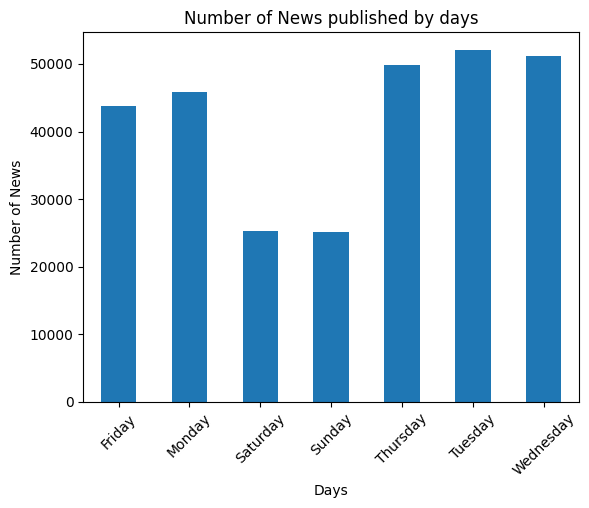

In [37]:
df['day_name'] = df['created_at'].dt.day_name()

news_count_by_day = df.groupby('day_name').id.count()

news_count_by_day.plot(kind="bar")
plt.xlabel('Days')
plt.ylabel('Number of News')
plt.title('Number of News published by days')
plt.xticks(rotation=45)  
plt.show()

Number of news published on each day.

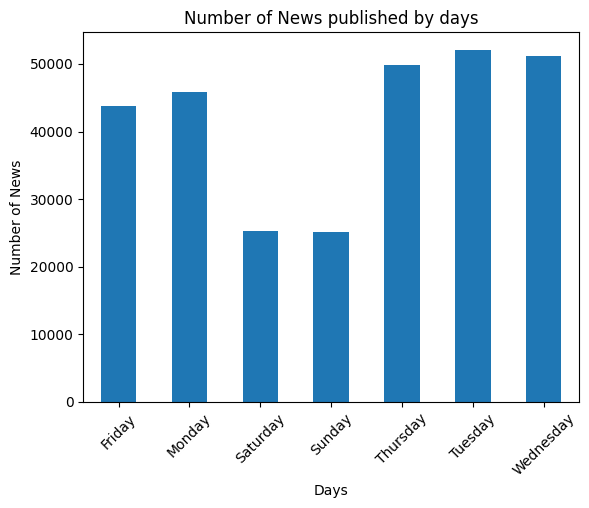

In [39]:
df['day_name'] = df['created_at'].dt.day_name()

news_count_by_day = df.groupby('day_name').id.count()

news_count_by_day.plot(kind="bar")
plt.xlabel('Days')
plt.ylabel('Number of News')
plt.title('Number of News published by days')
plt.xticks(rotation=45)  
plt.show()

Number of news published by each month

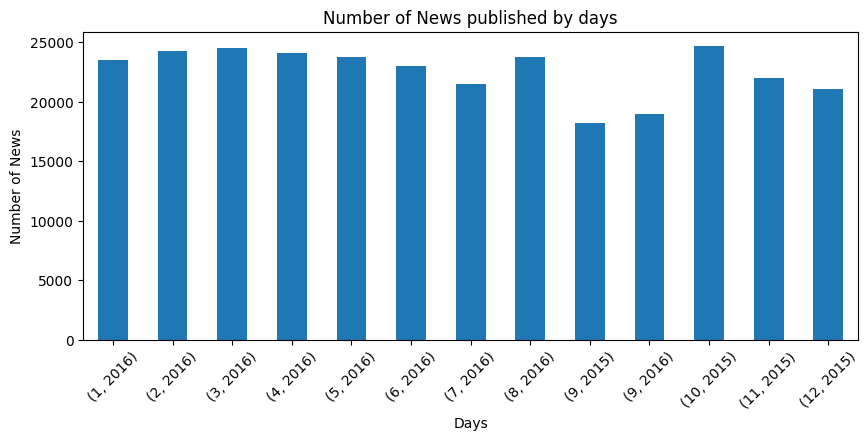

In [46]:
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year

news_count_by_day = df.groupby(['month','year']).id.count()

news_count_by_day.plot(kind="bar", figsize=(10, 4))
plt.xlabel('Days')
plt.ylabel('Number of News')
plt.title('Number of News published by days')
plt.xticks(rotation=45)  
plt.show()